In [2]:
from Partition import Partition, PartitionPair
import matplotlib.pyplot as plt


Funkcija ```generate(n)``` generate vrne slovar, v katerem so shranjeni pari kot ključi $(\lambda, \mu) \in N \times P$, da velja, $|\lambda| + |\mu| = n$, kjer je $N$ množica trikotniških razčlenitev iz razčličnih členov. Preslikane vrednosti, pa so pari $(\lambda', \mu')$, ki jih dobimo, z bijekcijo $\gamma$, involucijskega principa opisanega v diplomskem delu. 
Paru $(\lambda', \mu')$ je dodan še $k \in \mathbb{N}$, ki pove število potebnih iteracij za izvedbo $\gamma$.



In [3]:
def generate(n : int, even : bool = True) -> dict[PartitionPair, PartitionPair] :
    elements = dict()
    m = 0 if even else 1
    while True:
        m1 = (m * (3*m - 1)) // 2
        if m1 > n: break
        d = Partition.pentagonal_partition(m, minus=True)
        for p in Partition.partitions(n - m1):
            pair = PartitionPair(d.copy(), Partition(p))
            elements[pair] = pair.copy().principle()
        m += 2
    return elements
generate(20)



{[] [20]: (18, [2] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 [] [19, 1]: (0, [1] [19]),
 [] [18, 1, 1]: (0, [1] [18, 1]),
 [] [17, 1, 1, 1]: (0, [1] [17, 1, 1]),
 [] [16, 1, 1, 1, 1]: (0, [1] [16, 1, 1, 1]),
 [] [15, 1, 1, 1, 1, 1]: (0, [1] [15, 1, 1, 1, 1]),
 [] [14, 1, 1, 1, 1, 1, 1]: (0, [1] [14, 1, 1, 1, 1, 1]),
 [] [13, 1, 1, 1, 1, 1, 1, 1]: (0, [1] [13, 1, 1, 1, 1, 1, 1]),
 [] [12, 1, 1, 1, 1, 1, 1, 1, 1]: (0, [1] [12, 1, 1, 1, 1, 1, 1, 1]),
 [] [11, 1, 1, 1, 1, 1, 1, 1, 1, 1]: (0, [1] [11, 1, 1, 1, 1, 1, 1, 1, 1]),
 [] [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]: (0,
  [1] [10, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 [] [9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]: (0,
  [1] [9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 [] [8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]: (0,
  [1] [8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 [] [7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]: (0,
  [1] [7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 [] [6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]: (0,
  [1] [6, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [20]:
from time import time
import numpy as np
from typing import Tuple

def results(generated : dict[PartitionPair, Tuple[PartitionPair, int]]):
    iterat = []
    part = []
    for X, output in generated.items():
        iterations, Y = output
        iterat.append(iterations)
        part.append((X, Y))
    return iterat, part

"""
res[:,0] - max iterat
res[:,1] - average iterat
"""
def summary(N, even=True):
    time_start = time()
    res = np.zeros((N, 5))
    times = []
    biggest = []
    for i in range(1, N):
        h = generate(i, even)
        iterat, part = results(h)
        times.append(np.array(iterat))
        print(i)
        #print(i, np.max(iterat), np.average(iterat), np.median(iterat), time() - time_start)
        #print(part[np.argmax(iterat)])
        biggest.append(part[np.argmax(iterat)])

        # index of max iterat
        res[i] = [np.max(iterat), np.average(iterat), len(h), np.std(iterat), np.argmax(iterat)]
        time_start = time()
    return res


In [29]:
res_even = summary(60, even=True)
res_odd = summary(60, even=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


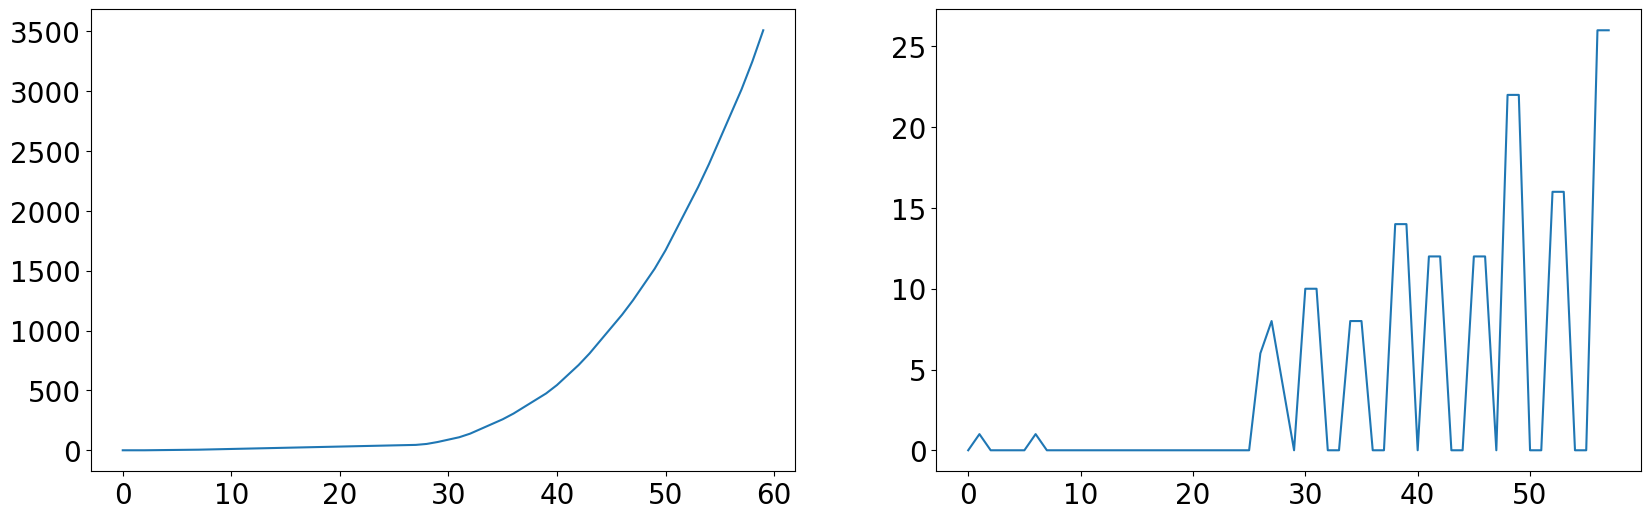

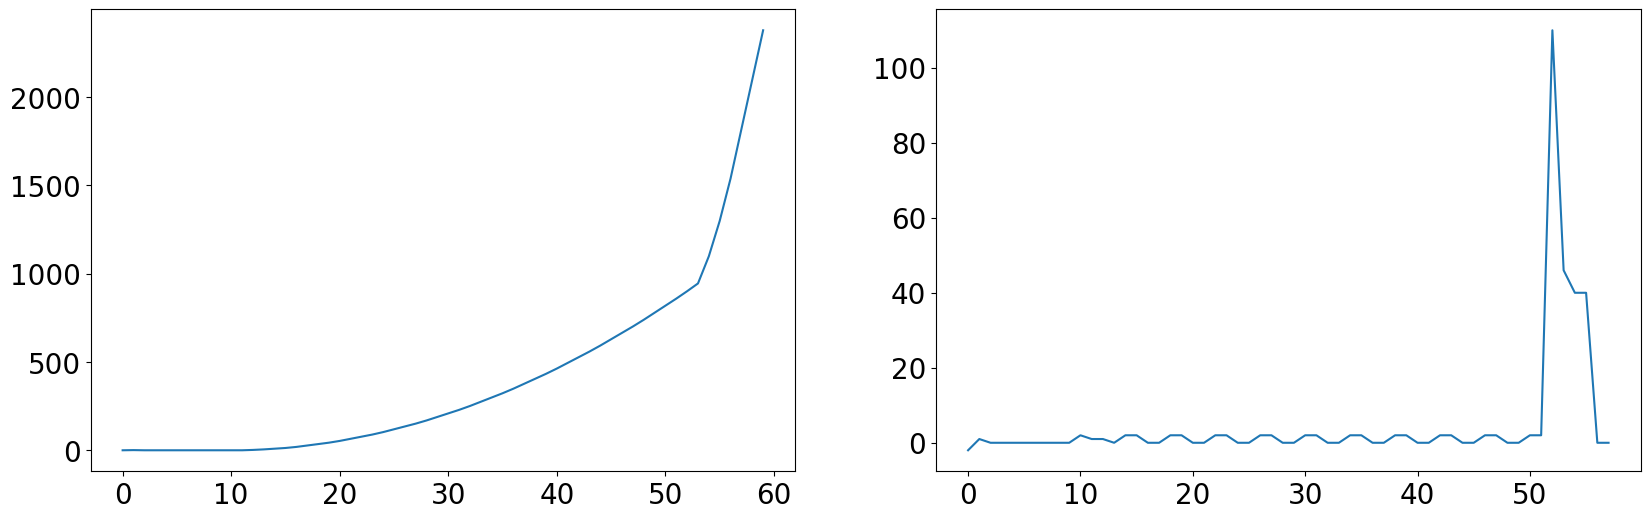

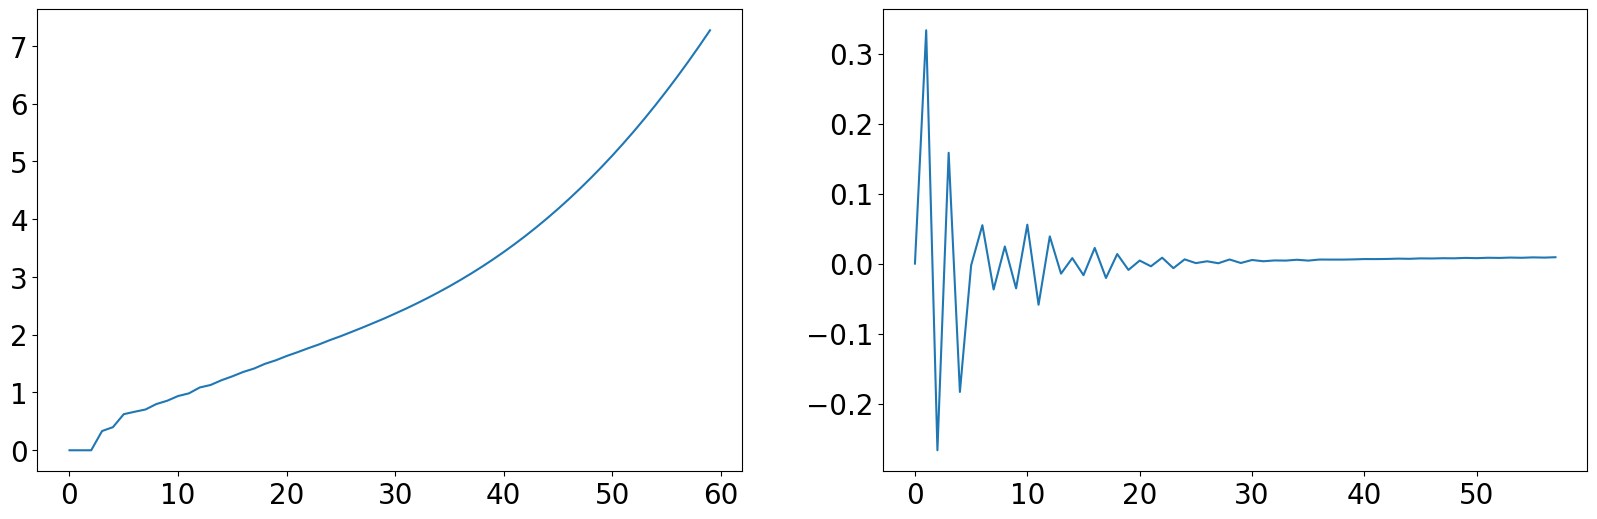

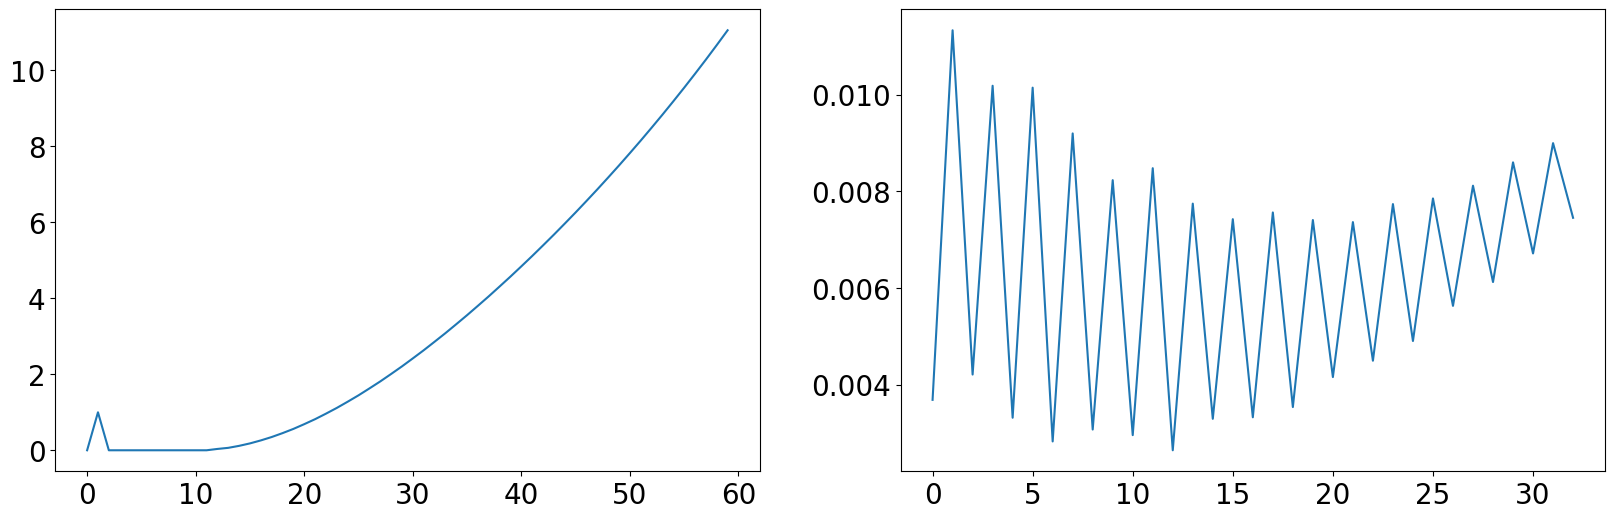

In [82]:
#import matplotlib

#plot res max
# draw 3 plots for each

# add titles to the plots
# add more spacing between the plots
# add left axis label
plt.figure(figsize=(20, 6))
# increase font siye so it would fit latex page
plt.rc('font', size=20)
plt.subplot(1, 2, 1)
plt.plot(res_even[:, 0])
plt.subplot(1, 2, 2)
plt.plot(np.diff(np.diff(res_even[:, 0]))) 
plt.show()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(res_odd[:, 0])
plt.subplot(1, 2, 2)
plt.plot(np.diff(np.diff(res_odd[:, 0])))
plt.show()


#plot res avg
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(res_even[:, 1])
plt.subplot(1, 2, 2)
plt.plot(np.diff(np.diff(res_even[:, 1])))
plt.show()



plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(res_odd[:, 1])
plt.subplot(1, 2, 2)
plt.plot(np.diff(np.diff(res_odd[:, 1])))
plt.show()

# #plot differences in max
# plt.plot(np.diff(res[:35,0]))

# #plot sec order differences in max 
# plt.plot(np.diff(np.diff(res[:35,0])))
# plot max
# plt.plot(res[:10,0])

#plot len of results
# plt.plot(res[:10,2])

#plot diff in avg 
#calculate pentagonal numbers
# plt.hist(times[20], bins=100)
# time = times[20]
# print([(i, np.round(np.count_nonzero(time == i) / len(time), decimals=5)) for i in range(10)])
   
# #partition with partition1 0
# pair = PartitionPair(Partition([]), Partition([1]))
# print(pair.principle())


# pent = [i * (3*i - 1) // 2 for i in range(1, 35)]
# pent2 = [i * (3*i + 1) // 2 for i in range(1, 35)]
# print(biggest[20][0].principle())

# # print(principle(biggest[12][0], printout=True))
# print(pent)
# print(pent2)


pair, [5, 4, 3] [2, 2, 1, 1, 1, 1, 1]


MovieWriter imagemagick unavailable; using Pillow instead.


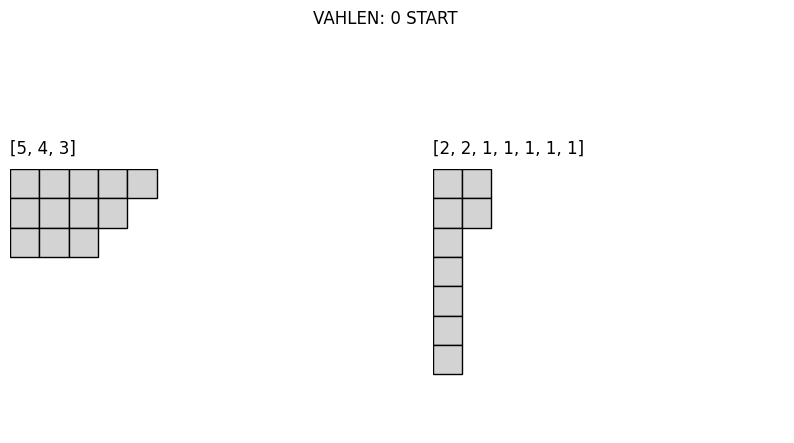

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation, FFMpegFileWriter

def draw_young_tableau(ax, partition, max_width, max_height):
    ax.clear()  # Clear previous drawings
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis visibility
    for y, row in enumerate(partition):
        for x in range(row):
            # Draw each square with consistent size and color
            ax.add_patch(patches.Rectangle((x, -y), 1, -1, fill=True, edgecolor='black', facecolor='lightgray'))
    # Adjust subplot limits to maintain consistent square sizes across frames
    ax.set_xlim(0, max(max_width, 1))
    ax.set_ylim(-max(max_height, 1), 0)
    # print partition over the diagram
    ax.text(0, 1, str(partition), fontsize=12, ha='left', va='top')


def update(frame_number):
    partition_pair = partition_pairs[frame_number]
    # Determine the max_width and max_height from all partitions to maintain consistent square sizes
    # all_partitions = [part for pair in partition_pairs for part in pair]
    # max_width = max(max(partition) for partition in all_partitions)
    # max_height = max(sum(len(partition) for partition in partition_pairs) // len(partition_pairs), 1)
    #create a title
    fig.suptitle(("VAHLEN" if frame_number % 2 == 0 else "FRANKLIN") + ": " + str(frame_number // 2) + " " + ("START" if frame_number == 0 else "END" if frame_number == len(partition_pairs) - 1 else ""))
    draw_young_tableau(axs[0], partition_pair.partition1, max_width, max_height)
    draw_young_tableau(axs[1], partition_pair.partition2, max_width, max_height)

# Example series of partition pairs
# partition_pairs = [PartitionPair(Partition([30, 4, 3, 1]), Partition([3, 3, 2, 1, 1])),
#                      PartitionPair(Partition([10, 6, 4, 3, 2, 1]), Partition([5, 4, 3, 2, 1])),
#                      PartitionPair(Partition([5, 4, 3, 2, 1]), Partition([4, 3, 2, 1])),
#                      PartitionPair(Partition([4, 3, 2, 1]), Partition([3, 2, 1])),
#                      PartitionPair(Partition([3, 2, 1]), Partition([2, 1])),
#                      PartitionPair(Partition([2, 1]), Partition([1]))]
pair = biggest[20][0]
print("pair,", pair)
partition_pairs = [el for el in pair.principle_generator(vahlen=True)]
max_height = max([max(len(p.partition1), len(p.partition2)) for p in partition_pairs])
max_width = max([max(p.partition1.largest(), p.partition2.largest()) for p in partition_pairs])

fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Adjust the figsize to ensure consistent square sizes
ani = FuncAnimation(fig, update, frames=len(partition_pairs), interval=1000, repeat=True)



ani.save(filename="ffmpeg_example.gif", writer="imagemagick")


In [58]:
pair = PartitionPair(Partition([5,4,3]), Partition([7,7,5,4,3,1, 1]))

# align printing of partitions
#find max length of strings
maxa = 0
maxb = 0
for p in pair.principle_generator(vahlen=True):
    a, b = p.partition1, p.partition2
    maxa = max(maxa, len(str(a)))
    maxb = max(maxb, len(str(b)))
print(maxa, maxb)
for i,p in enumerate(pair.principle_generator(vahlen=True)):
    a, b = p.partition1, p.partition2
    st = ""
    p1_str = str(a).ljust(maxa)
    p2_str = str(b).ljust(maxb)
    if i % 2 == 0:
        print(f"   VAHLEN:    {p1_str} {p2_str}")
    else:
        print(f"{i//2 + 1:2} FRANKLIN:  {p1_str} {p2_str}")

12 27
   VAHLEN:    [5, 4, 3]    [7, 7, 5, 4, 3, 1, 1]      
 1 FRANKLIN:  [5, 4, 3, 1] [7, 7, 5, 4, 3, 1]         
   VAHLEN:    [6, 4, 3]    [7, 7, 5, 4, 3, 1]         
 2 FRANKLIN:  [6, 4, 3, 1] [7, 7, 5, 4, 3]            
   VAHLEN:    [7, 4, 3]    [7, 7, 5, 4, 3]            
 3 FRANKLIN:  [7, 4]       [7, 7, 5, 4, 3, 3]         
   VAHLEN:    [6, 4, 1]    [7, 7, 5, 4, 3, 3]         
 4 FRANKLIN:  [6, 4]       [7, 7, 5, 4, 3, 3, 1]      
   VAHLEN:    [5, 4, 1]    [7, 7, 5, 4, 3, 3, 1]      
 5 FRANKLIN:  [5, 4]       [7, 7, 5, 4, 3, 3, 1, 1]   
   VAHLEN:    [4, 3, 2]    [7, 7, 5, 4, 3, 3, 1, 1]   
 6 FRANKLIN:  [4, 3, 2, 1] [7, 7, 5, 4, 3, 3, 1]      
   VAHLEN:    [5, 3, 2]    [7, 7, 5, 4, 3, 3, 1]      
 7 FRANKLIN:  [5, 3, 2, 1] [7, 7, 5, 4, 3, 3]         
   VAHLEN:    [6, 3, 2]    [7, 7, 5, 4, 3, 3]         
 8 FRANKLIN:  [6, 3]       [7, 7, 5, 4, 3, 3, 2]      
   VAHLEN:    [5, 3, 1]    [7, 7, 5, 4, 3, 3, 2]      
 9 FRANKLIN:  [5, 3]       [7, 7, 5, 4, 3, 3, 2, 1]   
   V